#### Problem Statement:

##### Business case:
    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

    In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

    In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### load libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling and analysis
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

#### load the dataset

In [2]:
df=pd.read_csv('insurance_fraud_detection.csv')

In [4]:
pd.set_option('display.max_columns',None)

## Step-1 Descriptive Analysis

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
dup_df=df[df.duplicated()]
dup_df.shape

(0, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

months_as_customer               0.0%
age                              0.0%
policy_number                    0.0%
policy_bind_date                 0.0%
policy_state                     0.0%
policy_csl                       0.0%
policy_deductable                0.0%
policy_annual_premium            0.0%
umbrella_limit                   0.0%
insured_zip                      0.0%
insured_sex                      0.0%
insured_education_level          0.0%
insured_occupation               0.0%
insured_hobbies                  0.0%
insured_relationship             0.0%
capital-gains                    0.0%
capital-loss                     0.0%
incident_date                    0.0%
incident_type                    0.0%
collision_type                   0.0%
incident_severity                0.0%
authorities_contacted            0.0%
incident_state                   0.0%
incident_city                    0.0%
incident_location                0.0%
incident_hour_of_the_day         0.0%
number_of_ve

In [9]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

## Step-2 Exploratory Data Analysis

we will create a **copy of the dataframe** for the analysis purpose.

In [10]:
df_copy=pd.DataFrame(data=df)
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
list_cols=df_copy.columns
list_cols

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
list_cols[0]

'months_as_customer'

##### 1.'months_as_customer'

In [13]:
df_copy['months_as_customer'].dtypes

dtype('int64')

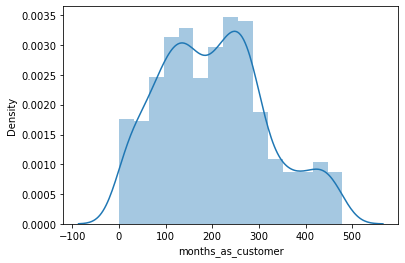

In [14]:
sn.distplot(df_copy['months_as_customer'])
plt.show()

In [15]:
list_cols[1]

'age'

##### 2.'age'

In [16]:
df_copy['age'].dtypes

dtype('int64')

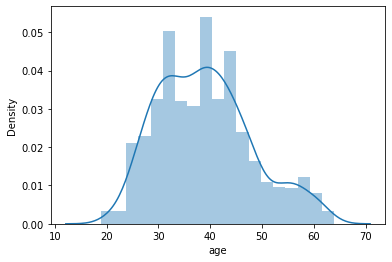

In [17]:
sn.distplot(df_copy['age'])
plt.show()

In [18]:
list_cols[2]

'policy_number'

##### 3.'policy_number'

In [19]:
df_copy['policy_number'].dtypes

dtype('int64')

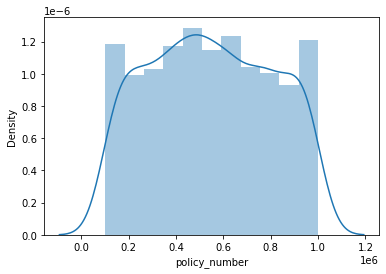

In [20]:
sn.distplot(df_copy['policy_number'])
plt.show()

In [21]:
list_cols[3]

'policy_bind_date'

##### 4.'policy_bind_date'

In [22]:
df_copy['policy_bind_date'].value_counts()

01-01-2006    3
05-08-1992    3
28-04-1992    3
19-09-1995    2
09-08-2004    2
             ..
17-11-2009    1
29-02-1992    1
14-02-1992    1
28-07-2008    1
16-03-1998    1
Name: policy_bind_date, Length: 951, dtype: int64

In [23]:
df_copy['policy_bind_date']=pd.to_datetime(df_copy['policy_bind_date'])

In [24]:
df_copy['policy_bind_day']=df_copy['policy_bind_date'].dt.day
df_copy['policy_bind_month']=df_copy['policy_bind_date'].dt.month

In [25]:
df_copy['policy_bind_year']=df_copy['policy_bind_date'].dt.year

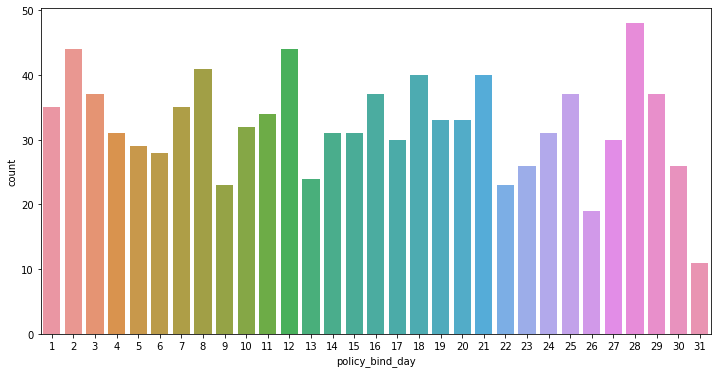

In [26]:
plt.figure(figsize=(12,6))
sn.countplot(df_copy['policy_bind_day'])
plt.show()

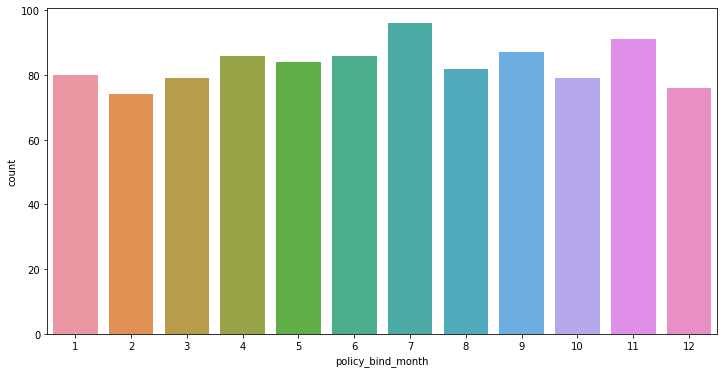

In [27]:
plt.figure(figsize=(12,6))
sn.countplot(df_copy['policy_bind_month'])
plt.show()

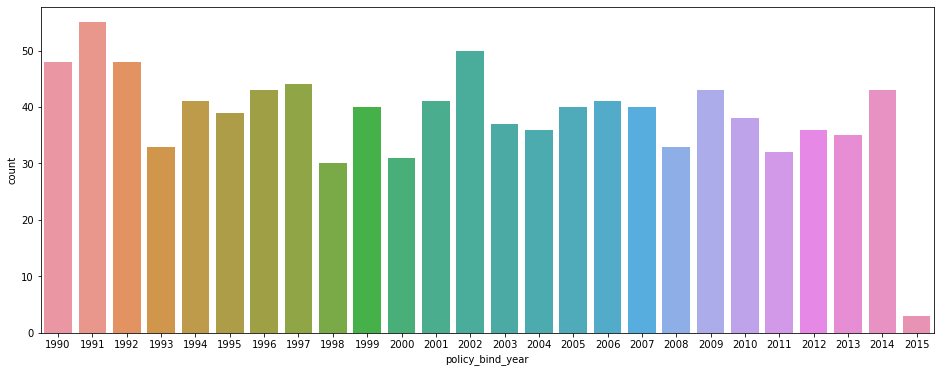

In [28]:
plt.figure(figsize=(16,6))
sn.countplot(df_copy['policy_bind_year'])
plt.show()

In [29]:
list_cols[4]

'policy_state'

##### 5. 'policy_state'

In [30]:
df_copy['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

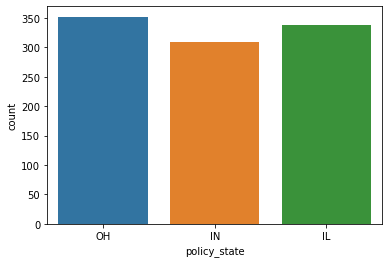

In [31]:
sn.countplot(df_copy['policy_state'])
plt.show()

In [32]:
list_cols[5]

'policy_csl'

##### 6.'policy_csl'

In [33]:
df_copy['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

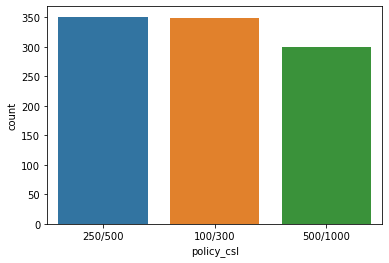

In [34]:
sn.countplot(df_copy['policy_csl'])
plt.show()

In [35]:
list_cols[6]

'policy_deductable'

##### 7.'policy_deductable'

In [36]:
df_copy['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

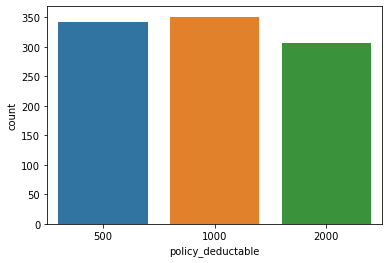

In [37]:
sn.countplot(df_copy['policy_deductable'])
plt.show()

In [38]:
list_cols[7]

'policy_annual_premium'

##### 8.'policy_annual_premium'

In [39]:
df_copy['policy_annual_premium'].value_counts()

1374.22    2
1558.29    2
1389.13    2
1073.83    2
1074.07    2
          ..
1268.79    1
1558.86    1
722.66     1
1302.40    1
1212.00    1
Name: policy_annual_premium, Length: 991, dtype: int64

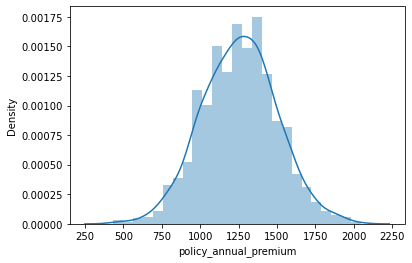

In [40]:
sn.distplot(df_copy['policy_annual_premium'])
plt.show()

In [41]:
list_cols[8]

'umbrella_limit'

##### 9.'umbrella_limit'

In [42]:
df_copy['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

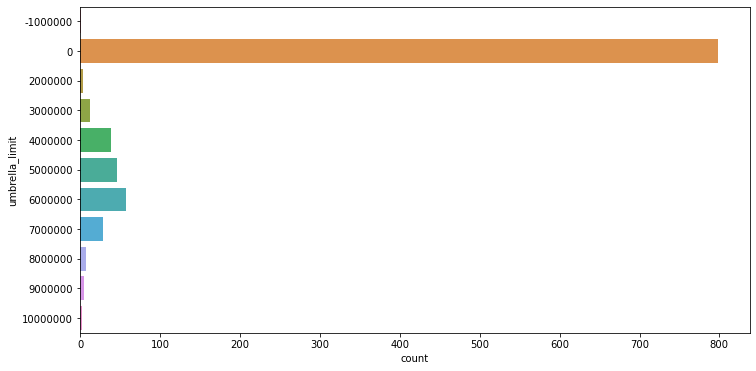

In [43]:
plt.figure(figsize=(12,6))
sn.countplot(y=df_copy['umbrella_limit'])
plt.show()

In [44]:
list_cols[9]

'insured_zip'

##### 10.'insured_zip'

In [45]:
df_copy['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

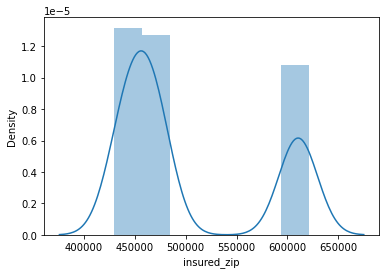

In [46]:
sn.distplot(df_copy['insured_zip'])
plt.show()

In [47]:
list_cols[10]

'insured_sex'

##### 11.'insured_sex'

In [48]:
df_copy['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

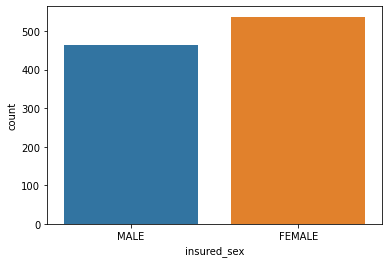

In [49]:
sn.countplot(df_copy['insured_sex'])
plt.show()

In [50]:
list_cols[11]

'insured_education_level'

##### 12.'insured_education_level'

In [51]:
df_copy['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

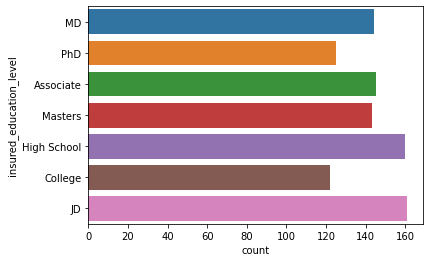

In [52]:
sn.countplot(y=df_copy['insured_education_level'])
plt.show()

In [53]:
list_cols[12]

'insured_occupation'

##### 13.'insured_occupation'

In [54]:
df_copy['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

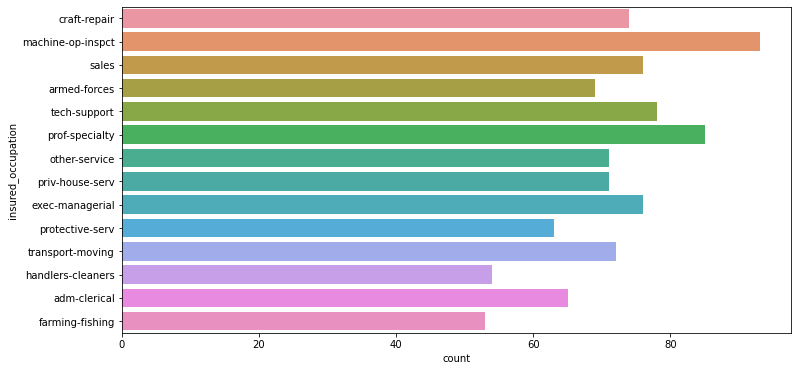

In [55]:
plt.figure(figsize=(12,6))
sn.countplot(y=df_copy['insured_occupation'])
plt.show()

In [56]:
list_cols[13]

'insured_hobbies'

##### 14.'insured_hobbies'

In [57]:
df_copy['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

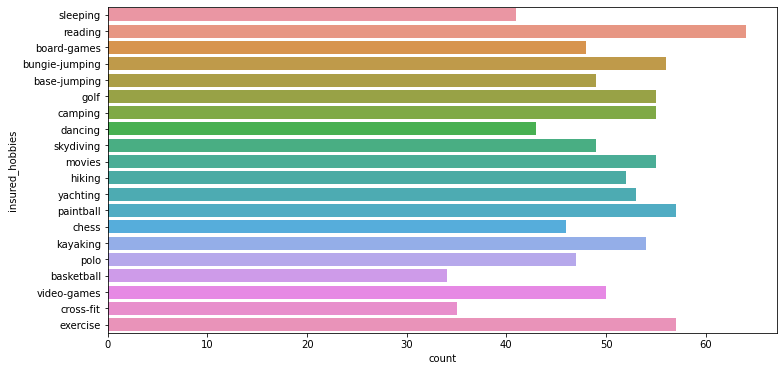

In [58]:
plt.figure(figsize=(12,6))
sn.countplot(y=df_copy['insured_hobbies'])
plt.show()

In [59]:
list_cols[14]

'insured_relationship'

##### 15.'insured_relationship'

In [60]:
df_copy['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

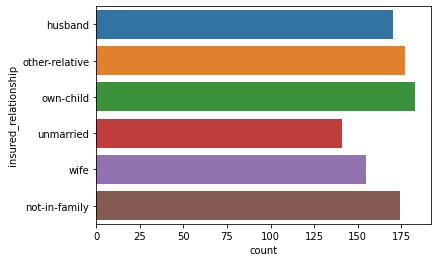

In [61]:
sn.countplot(y=df_copy['insured_relationship'])
plt.show()

In [62]:
list_cols[15]

'capital-gains'

##### 16.'capital-gains'

In [63]:
df_copy['capital-gains'].value_counts()

0         508
46300       5
68500       4
51500       4
48900       3
         ... 
47700       1
94800       1
90700       1
100500      1
54800       1
Name: capital-gains, Length: 338, dtype: int64

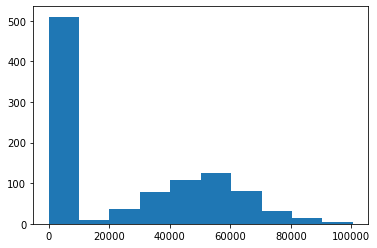

In [64]:
plt.hist(df_copy['capital-gains'])
plt.show()

In [65]:
list_cols[16]

'capital-loss'

##### 17.'capital-loss'

In [66]:
df_copy['capital-loss'].value_counts()

 0        475
-53700      5
-50300      5
-31700      5
-49200      4
         ... 
-32600      1
-46800      1
-50600      1
-40800      1
-43900      1
Name: capital-loss, Length: 354, dtype: int64

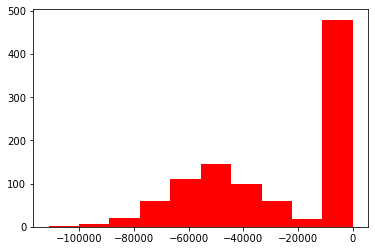

In [67]:
plt.hist(df_copy['capital-loss'],color='red')
plt.show()

In [68]:
list_cols[17]

'incident_date'

##### 18.'incident_date'

In [69]:
df_copy['incident_date']=pd.to_datetime(df_copy['incident_date'])
df_copy['incident_day']=df_copy['incident_date'].dt.day
df_copy['incident_month']=df_copy['incident_date'].dt.month

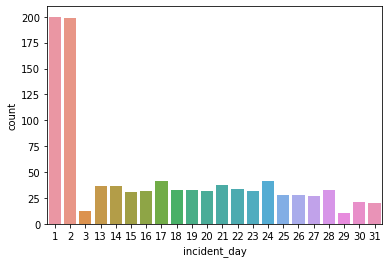

In [70]:
sn.countplot(df_copy['incident_day'])
plt.show()

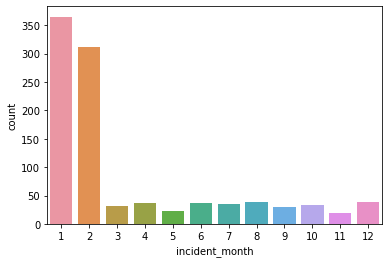

In [71]:
sn.countplot(df_copy['incident_month'])
plt.show()

In [72]:
list_cols[18]

'incident_type'

##### 19.'incident_type'

In [73]:
df_copy['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

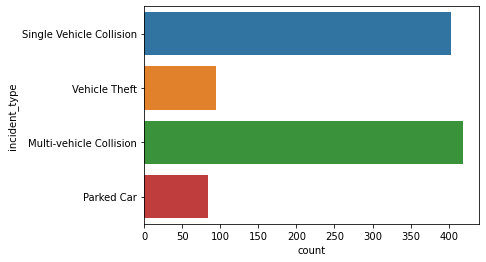

In [74]:
sn.countplot(y=df_copy['incident_type'])
plt.show()

In [75]:
list_cols[19]

'collision_type'

##### 20.'collision_type'

In [76]:
df_copy['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

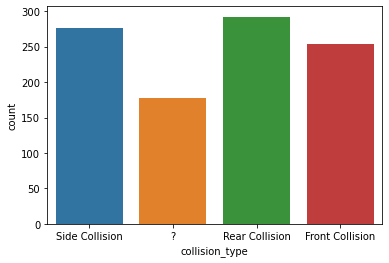

In [77]:
sn.countplot(df_copy['collision_type'])
plt.show()

In [79]:
list_cols[20]

'incident_severity'

##### 21.'incident_severity'

In [80]:
df_copy['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

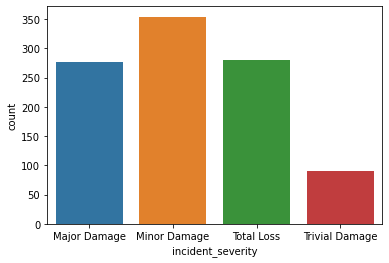

In [81]:
sn.countplot(df_copy['incident_severity'])
plt.show()

In [82]:
list_cols[21]

'authorities_contacted'

##### 22.'authorities_contacted'

In [83]:
df_copy['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

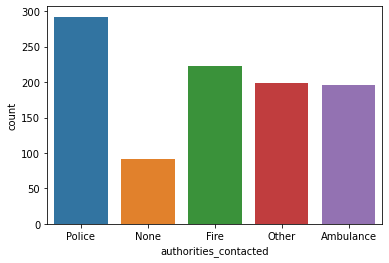

In [84]:
sn.countplot(df_copy['authorities_contacted'])
plt.show()

In [85]:
list_cols[22]

'incident_state'

##### 23.'incident_state'

In [86]:
df_copy['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

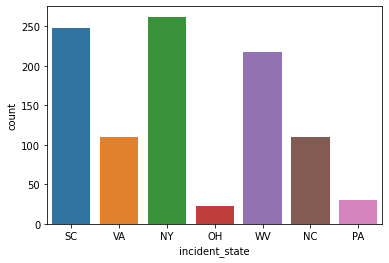

In [87]:
sn.countplot(df_copy['incident_state'])
plt.show()

In [88]:
list_cols[23]

'incident_city'

##### 24.'incident_city'

In [89]:
df_copy['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

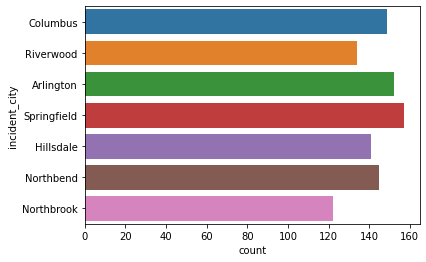

In [91]:
sn.countplot(y=df_copy['incident_city'])
plt.show()

In [92]:
list_cols[24]

'incident_location'

##### 25.'incident_location'

In [93]:
df_copy['incident_location'].value_counts()

8704 Britain Lane        1
8639 5th Hwy             1
1654 Pine St             1
2808 Elm St              1
6677 Andromedia Drive    1
                        ..
9798 Sky Ridge           1
3221 Solo Ridge          1
5191 4th St              1
6981 Weaver St           1
3707 Oak Ridge           1
Name: incident_location, Length: 1000, dtype: int64

In [94]:
list_cols[25]

'incident_hour_of_the_day'

##### 26.'incident_hour_of_the_day'

In [97]:
df_copy['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

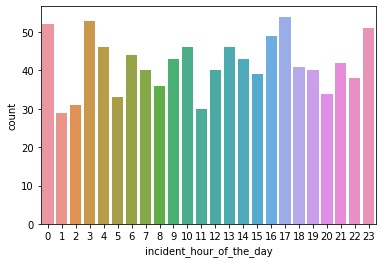

In [98]:
sn.countplot(df_copy['incident_hour_of_the_day'])
plt.show()

In [99]:
list_cols[26]

'number_of_vehicles_involved'

##### 27.'number_of_vehicles_involved'

In [100]:
df_copy['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

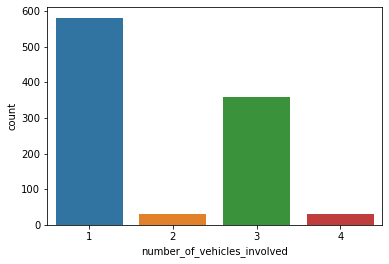

In [102]:
sn.countplot(df_copy['number_of_vehicles_involved'])
plt.show()

In [103]:
list_cols[27]

'property_damage'

##### 28.'property_damage'

In [104]:
df_copy['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

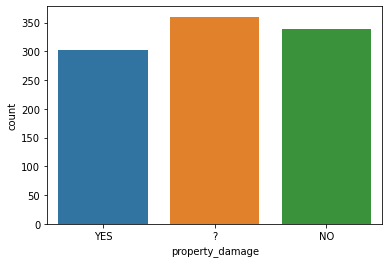

In [105]:
sn.countplot(df_copy['property_damage'])
plt.show()

In [106]:
list_cols[28]

'bodily_injuries'

##### 29.'bodily_injuries'

In [107]:
df_copy['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

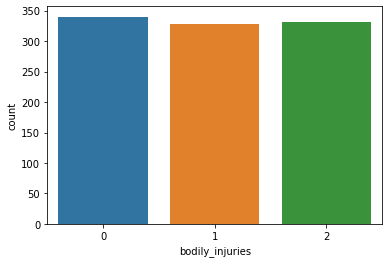

In [108]:
sn.countplot(df_copy['bodily_injuries'])
plt.show()

In [109]:
list_cols[29]

'witnesses'

##### 30.'witnesses'

In [110]:
df_copy['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

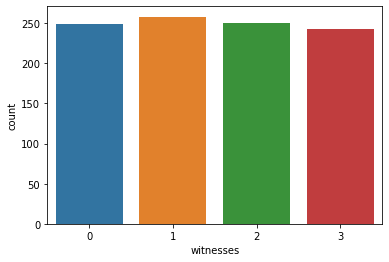

In [111]:
sn.countplot(df_copy['witnesses'])
plt.show()

In [112]:
list_cols[30]

'police_report_available'

##### 31.'police_report_available'

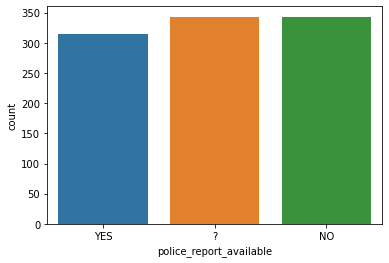

In [113]:
sn.countplot(df_copy['police_report_available'])
plt.show()

In [114]:
list_cols[31]

'total_claim_amount'

##### 32.'total_claim_amount'

In [115]:
df_copy['total_claim_amount'].value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

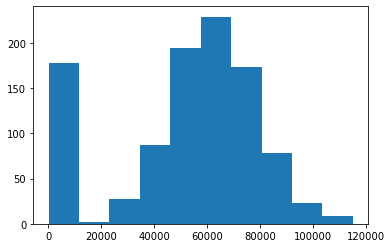

In [116]:
plt.hist(df_copy['total_claim_amount'])
plt.show()

In [117]:
list_cols[32]

'injury_claim'

##### 33.'injury_claim'

In [118]:
df_copy['injury_claim'].value_counts()

0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64

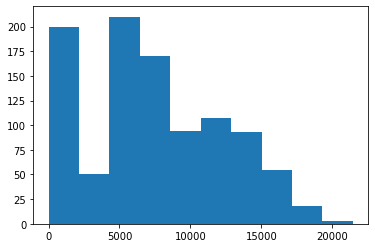

In [119]:
plt.hist(df_copy['injury_claim'])
plt.show()

In [120]:
list_cols[33]

'property_claim'

##### 34.'property_claim'

In [121]:
df_copy['property_claim'].value_counts()

0        19
860       6
660       5
480       5
10000     5
         ..
17880     1
1500      1
14080     1
7850      1
21630     1
Name: property_claim, Length: 626, dtype: int64

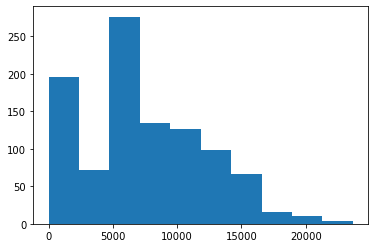

In [122]:
plt.hist(df_copy['property_claim'])
plt.show()

In [123]:
list_cols[34]

'vehicle_claim'

##### 35.'vehicle_claim'

In [124]:
df_copy['vehicle_claim'].value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

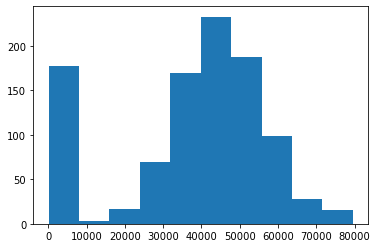

In [125]:
plt.hist(df_copy['vehicle_claim'])
plt.show()

In [126]:
list_cols[35]

'auto_make'

##### 36.'auto_make'

In [127]:
df_copy['auto_make'].value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

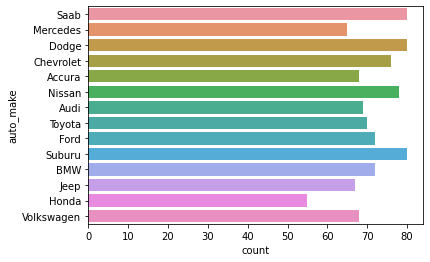

In [129]:
sn.countplot(y=df_copy['auto_make'])
plt.show()

In [130]:
list_cols[36]

'auto_model'

##### 37.'auto_model'

In [131]:
df_copy['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
F150              27
95                27
E400              27
Grand Cherokee    25
93                25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Corolla           20
CRV               20
Impreza           20
TL                20
ML350             20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

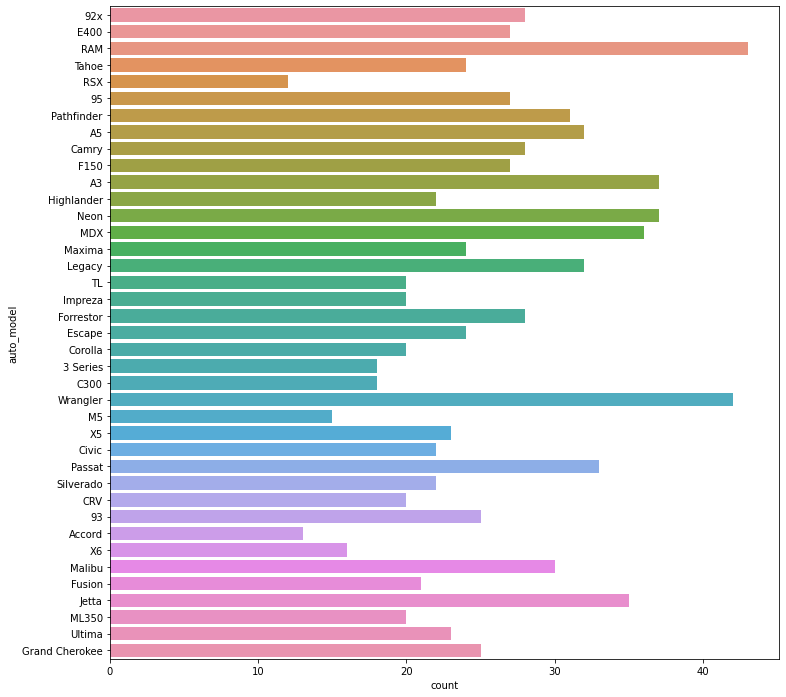

In [134]:
plt.figure(figsize=(12,12))
sn.countplot(y=df_copy['auto_model'])
plt.show()

In [135]:
list_cols[37]

'auto_year'

##### 38.'auto_year'

In [136]:
df_copy['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

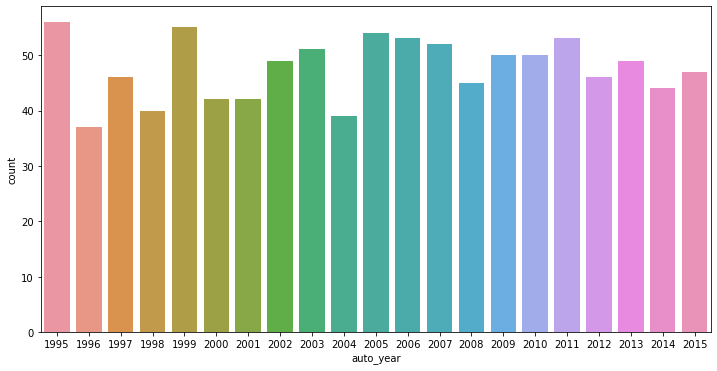

In [137]:
plt.figure(figsize=(12,6))
sn.countplot(df_copy['auto_year'])
plt.show()

In [138]:
list_cols[38]

'fraud_reported'

##### 39.'fraud_reported'

In [139]:
df_copy['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

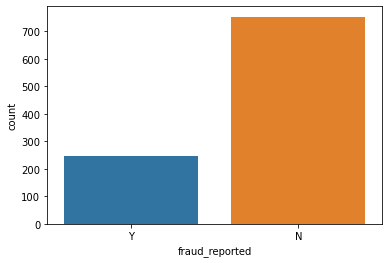

In [140]:
sn.countplot(df_copy['fraud_reported'])
plt.show()

In [141]:
list_cols[39]

'_c39'

##### 40.'_c39'

In [142]:
df_copy['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

## Step-3 Data Preprocessing

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### Missing values

In [14]:
round(df.isin(['?']).sum()/df.shape[0]*100,2).astype(str)+"%"

months_as_customer              0.0%
age                             0.0%
policy_number                   0.0%
policy_bind_date                0.0%
policy_state                    0.0%
policy_csl                      0.0%
policy_deductable               0.0%
policy_annual_premium           0.0%
umbrella_limit                  0.0%
insured_zip                     0.0%
insured_sex                     0.0%
insured_education_level         0.0%
insured_occupation              0.0%
insured_hobbies                 0.0%
insured_relationship            0.0%
capital-gains                   0.0%
capital-loss                    0.0%
incident_date                   0.0%
incident_type                   0.0%
collision_type                 17.8%
incident_severity               0.0%
authorities_contacted           0.0%
incident_state                  0.0%
incident_city                   0.0%
incident_location               0.0%
incident_hour_of_the_day        0.0%
number_of_vehicles_involved     0.0%
p

In [15]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

months_as_customer               0.0%
age                              0.0%
policy_number                    0.0%
policy_bind_date                 0.0%
policy_state                     0.0%
policy_csl                       0.0%
policy_deductable                0.0%
policy_annual_premium            0.0%
umbrella_limit                   0.0%
insured_zip                      0.0%
insured_sex                      0.0%
insured_education_level          0.0%
insured_occupation               0.0%
insured_hobbies                  0.0%
insured_relationship             0.0%
capital-gains                    0.0%
capital-loss                     0.0%
incident_date                    0.0%
incident_type                    0.0%
collision_type                   0.0%
incident_severity                0.0%
authorities_contacted            0.0%
incident_state                   0.0%
incident_city                    0.0%
incident_location                0.0%
incident_hour_of_the_day         0.0%
number_of_ve

'collision_type' , 'property_damage' , 'police_report_available' features have missing data in the form of '?' while '_c39' feature has all values missing, so we will drop _c39 feature.

In [16]:
df.drop('_c39',axis=1,inplace=True)

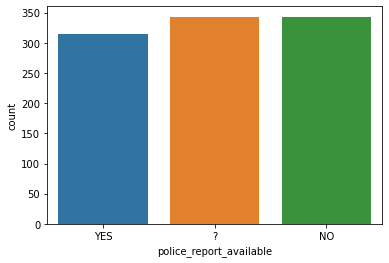

In [25]:
sn.countplot(df['police_report_available'])
plt.show()

In [22]:
df['collision_type']=df['collision_type'].replace('?','Rear Collision')

In [26]:
df['property_damage']=df['property_damage'].replace('?','No')

In [27]:
df['police_report_available']=df['police_report_available'].replace('?','No')

### Outlier detection

In [28]:
numerical_cols=[]
numerical_cols.clear()
for column in df:
    if df[column].dtypes!='object':
        numerical_cols.append(column)

In [29]:
len(numerical_cols)

18

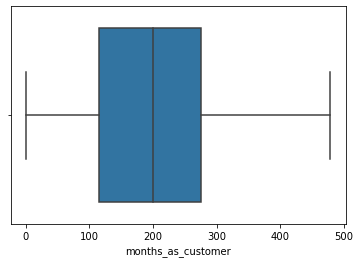

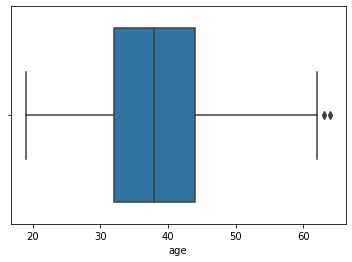

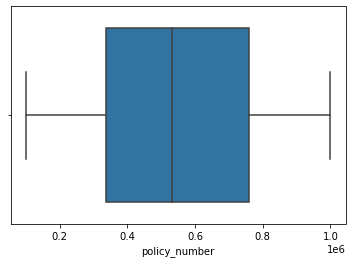

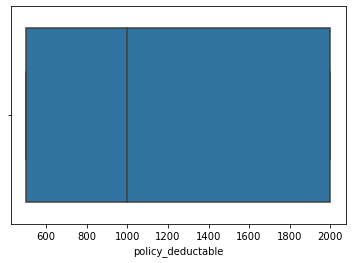

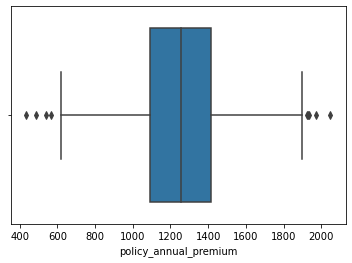

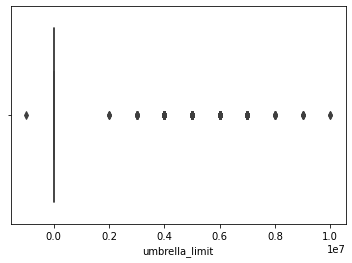

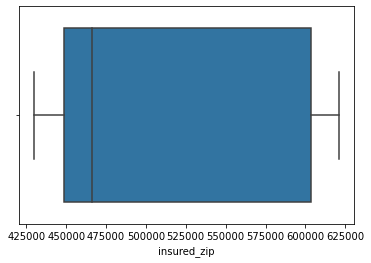

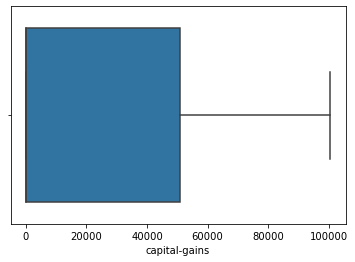

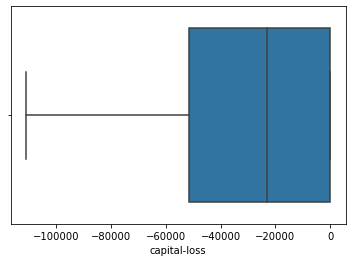

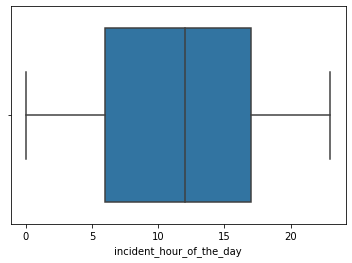

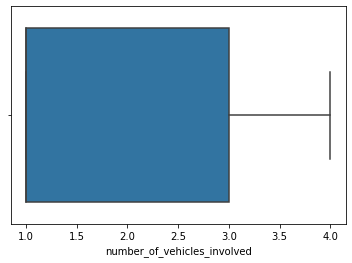

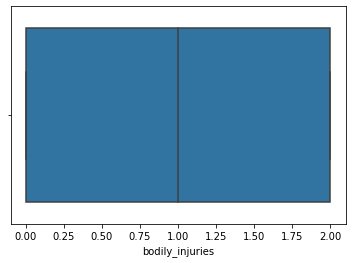

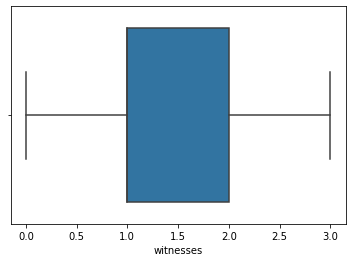

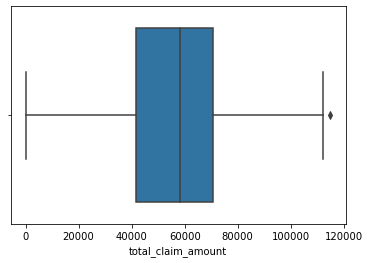

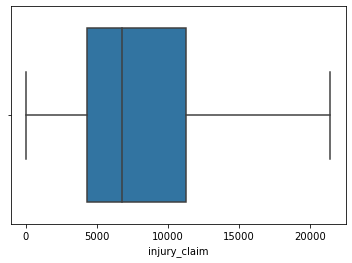

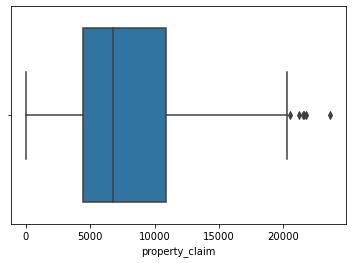

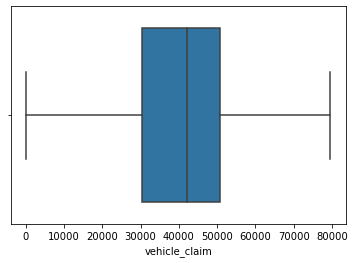

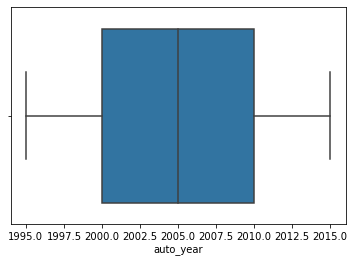

In [32]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.boxplot(df[column])
    ax.set_xlabel(column)
    plt.show()

we see that only 'umbrella_limit' feature is having data which lies very away from the max or 90th and 100th percentiles.

### skewness check

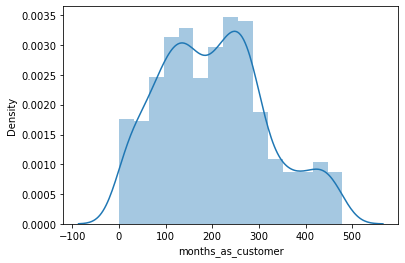

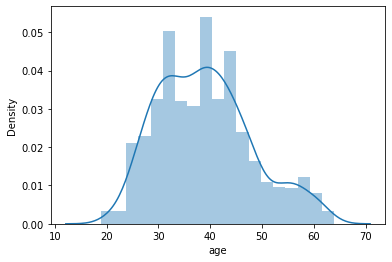

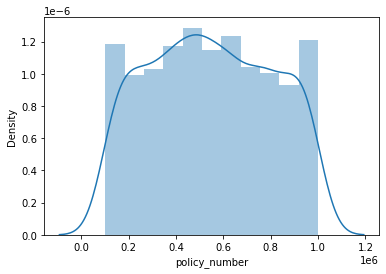

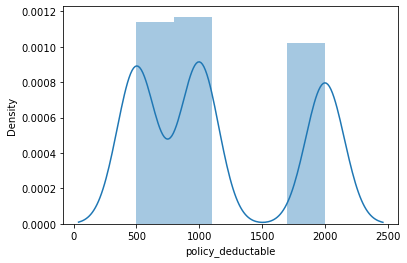

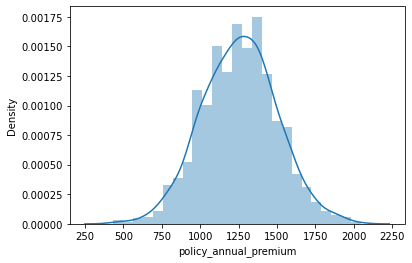

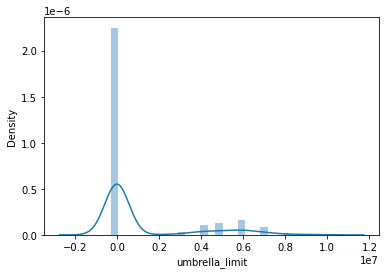

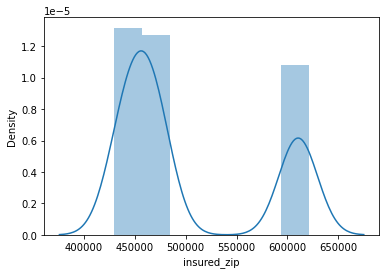

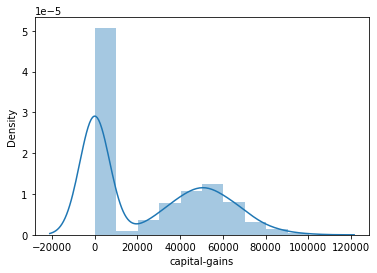

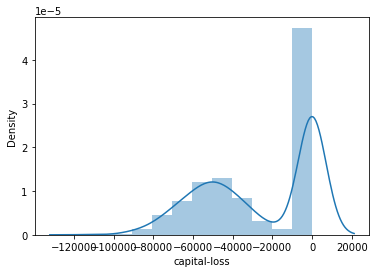

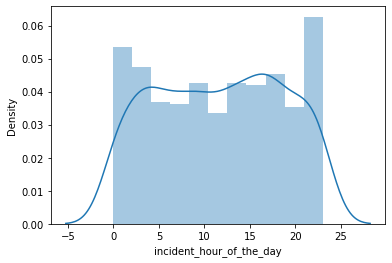

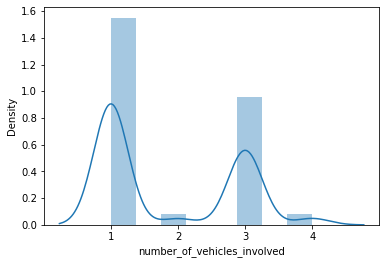

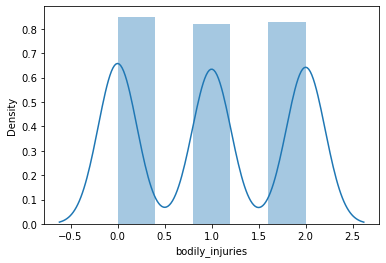

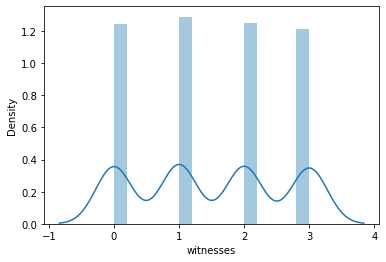

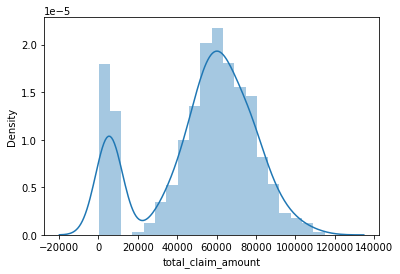

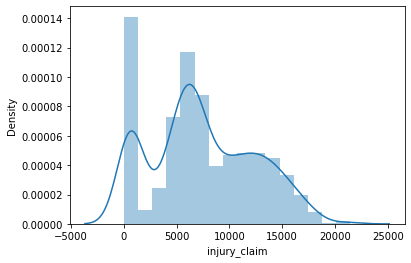

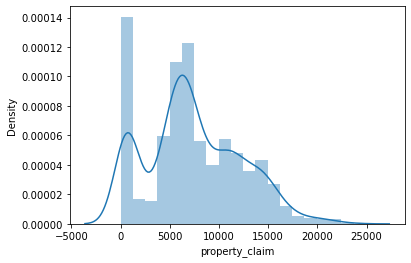

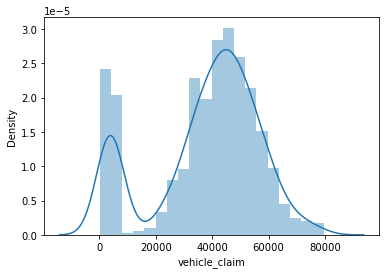

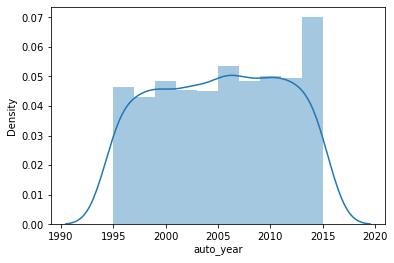

In [34]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(df[column])
    ax.set_xlabel(column)
    plt.show()

#### Feature extraction

In [35]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [39]:
date_features=['policy_bind_date','incident_date']
for i in date_features:
    df[str(i)+' day']=pd.to_datetime(df[i]).dt.day
    df[str(i)+' month']=pd.to_datetime(df[i]).dt.month

In [41]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_date day',
       'policy_bind_date month', 'incident_date day', 'incident_date month'],
      dtype='object')

Now we can drop the 'policy_bind_date','incident_date' features.

In [42]:
df.drop(date_features,axis=1,inplace=True)

In [43]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_date day',
       'policy_bind_date month', 'incident_date day', 'incident_date month'],
      dtype='object')

#### Label encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [46]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

#### feature transformations

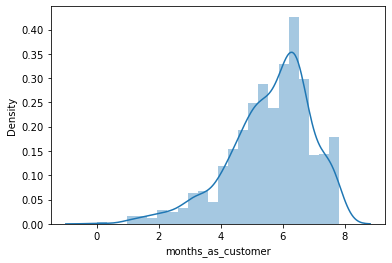

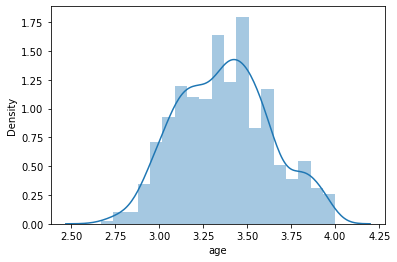

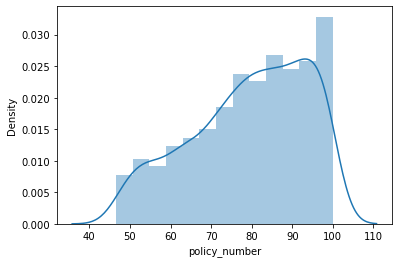

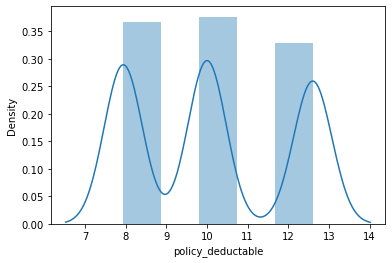

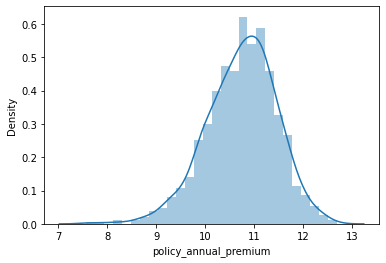

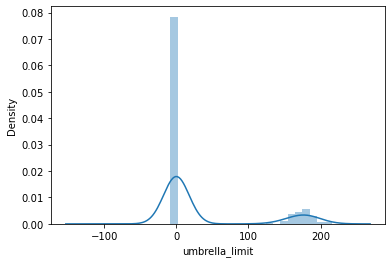

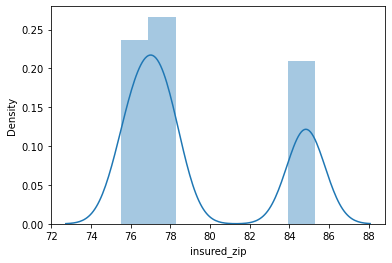

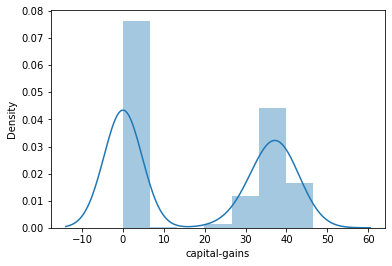

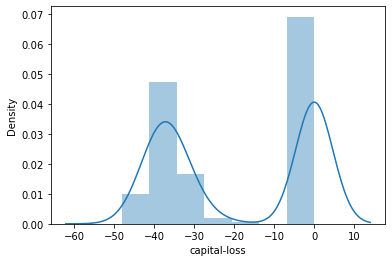

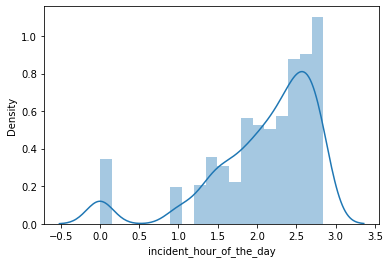

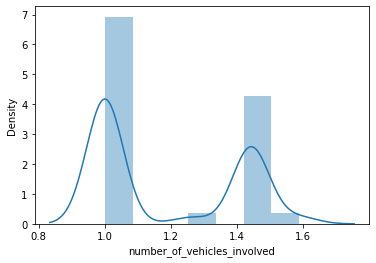

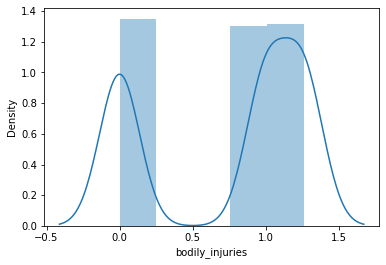

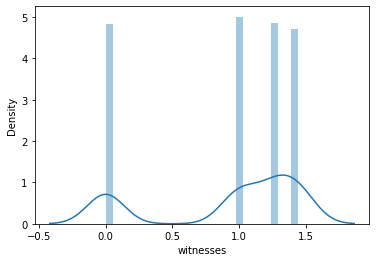

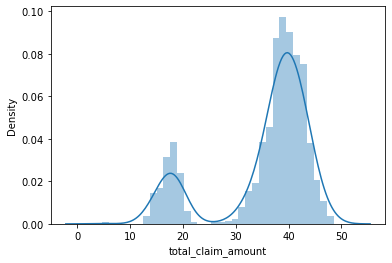

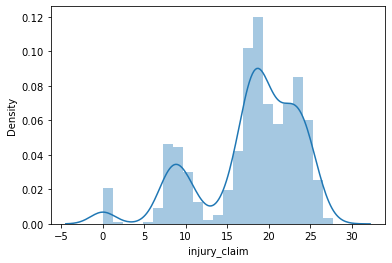

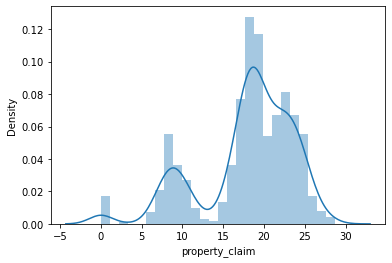

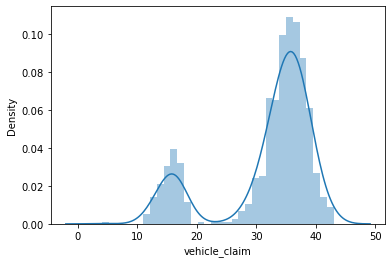

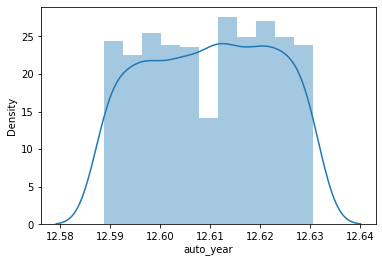

In [49]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(np.cbrt(df[column]))
    ax.set_xlabel(column)
    plt.show()

#### Split dataset into independent and target features

In [50]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [51]:
print(x.shape)
print(y.shape)

(1000, 40)
(1000,)


#### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [53]:
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

In [55]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [56]:
for col in x.columns:
    x[col]=m.fit_transform(x[col].values.reshape(-1,1))

#### Column Reduction

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
x=pca.fit_transform(x)

In [73]:
x.shape

(1000, 7)

### Finding best random state

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.8151515151515152  at random state  190


## Step-4 Modelling

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=190)

In [77]:
print(x_train.shape)
print(y_train.shape)

(670, 7)
(670,)


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
lr=LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()

In [80]:
seed=7

models = []

models.append(('Losgistic Regression', lr))
models.append(('Random Forest', rf))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gaussian', gnb))
models.append(('ExtraTrees Classifier', er))

In [81]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Losgistic Regression: 0.753000 
Random Forest: 0.741000 
KNN: 0.701000 
Decision Tree: 0.637000 
Gaussian: 0.753000 
ExtraTrees Classifier: 0.746000 


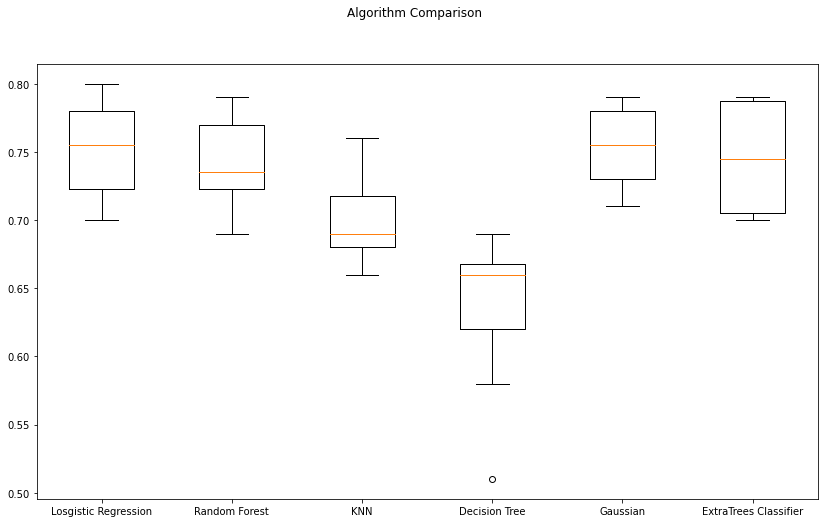

In [82]:
#Boxplot for algorithm comparision

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### We will go ahead with Logistic Regression

## Step-5 Hyper Parameter tuning

In [83]:
from sklearn.model_selection import GridSearchCV
parameters={'multi_class' : ['auto', 'ovr', 'multinomial']}

model=lr

grid=GridSearchCV(estimator=model,param_grid=parameters)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.multi_class)
print(grid.best_params_)

0.756
auto
{'multi_class': 'auto'}


In [84]:
fin_model=LogisticRegression(multi_class='auto')

### Step-6 Saving the Model

In [85]:
import joblib
joblib.dump(fin_model,"Insurance fraud detection.pkl")

['Insurance fraud detection.pkl']